In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
startup=pd.read_csv('/content/50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startup.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**Scatter plot**

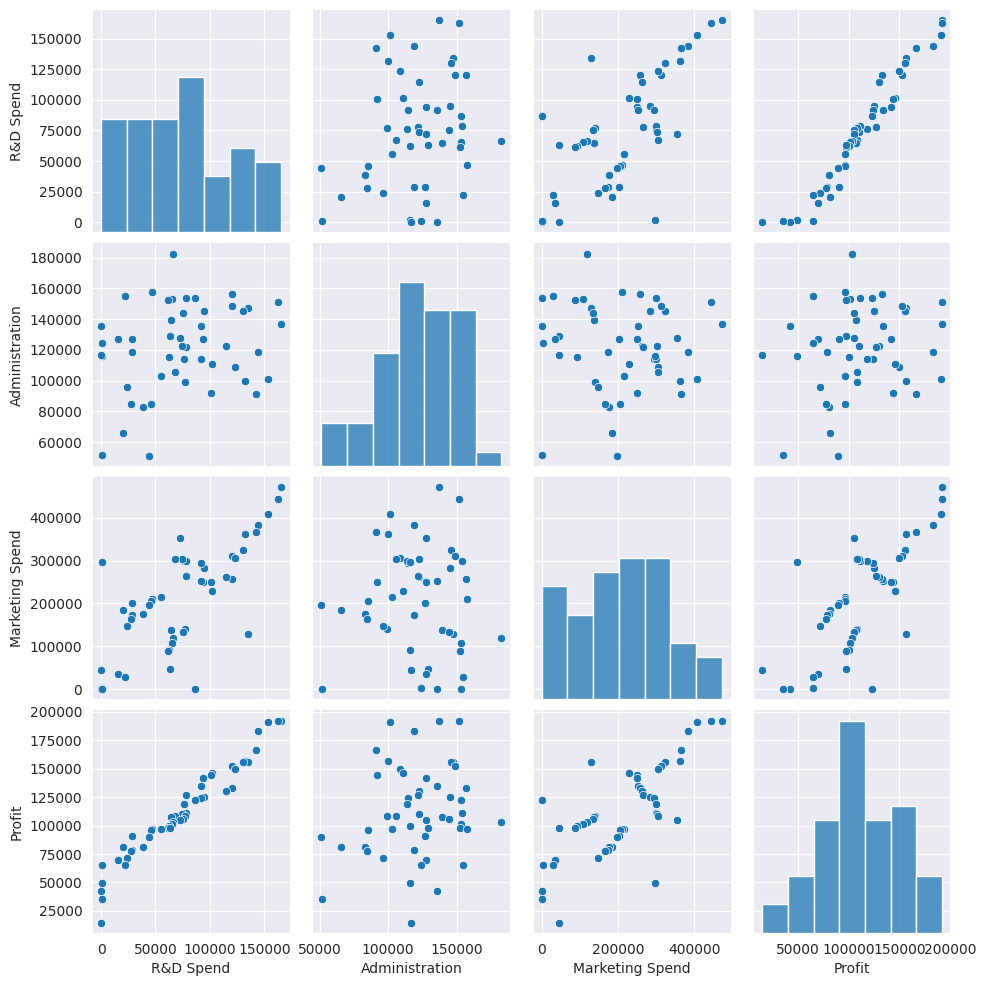

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [ ]:
data=startup.rename({'Marketing Spend':'Marketing_Spend'},axis=1)
startups=data.rename({'R&D Spend':'RandD_Spend'},axis=1)
startups

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**Model Building**

In [ ]:
model = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data = startups).fit()

In [ ]:
model.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [ ]:
print("*** t-values ***",'\n',model.tvalues,'\n',"*** p-values ***",'\n',model.pvalues)

*** t-values *** 
 Intercept           7.626218
RandD_Spend        17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 *** p-values *** 
 Intercept          1.057379e-09
RandD_Spend        2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


**Residual Analysis**
1 - Test for normality of Residuals(Q-Q plot)

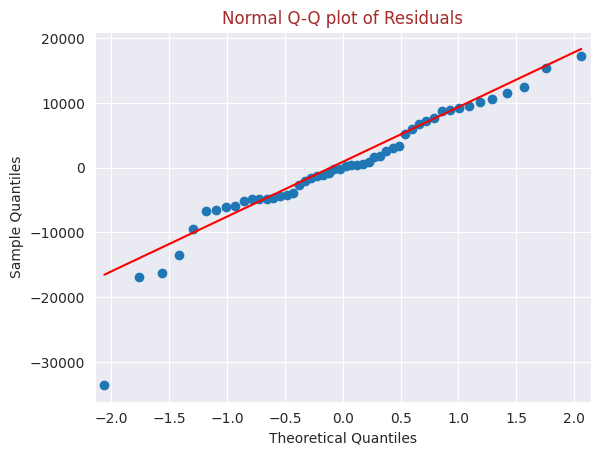

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals", color='brown')
plt.show()

2 - Residual plot for Homoscedasticity

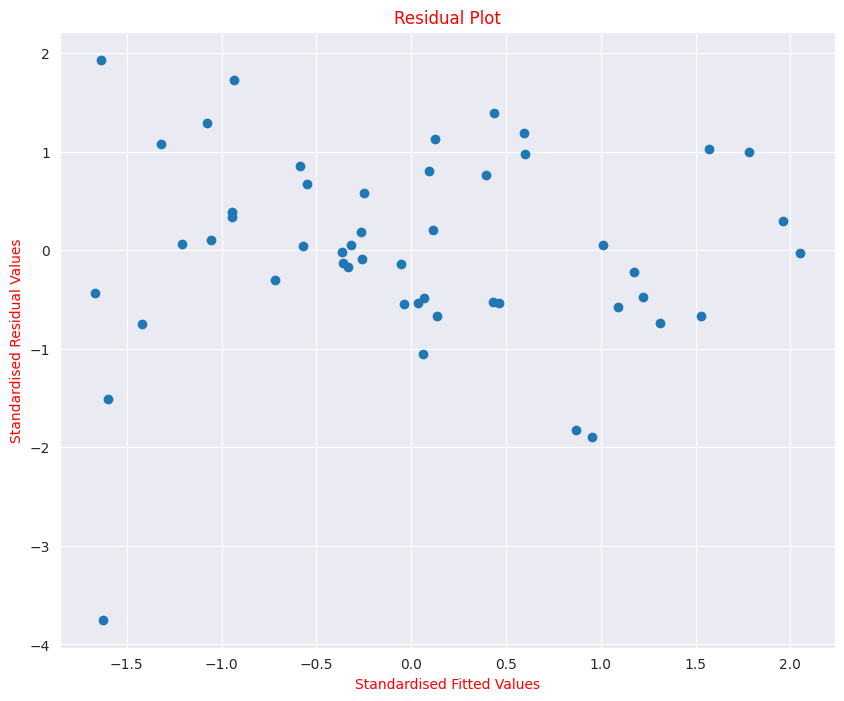

In [ ]:
def get_standardised_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.figure(figsize=(10,8))
plt.scatter(get_standardised_values(model.fittedvalues),
            get_standardised_values(model.resid))
plt.title('Residual Plot', color='red')
plt.xlabel('Standardised Fitted Values', color='red')
plt.ylabel('Standardised Residual Values', color='red')
plt.show()

3 - Residual Vs Regressors

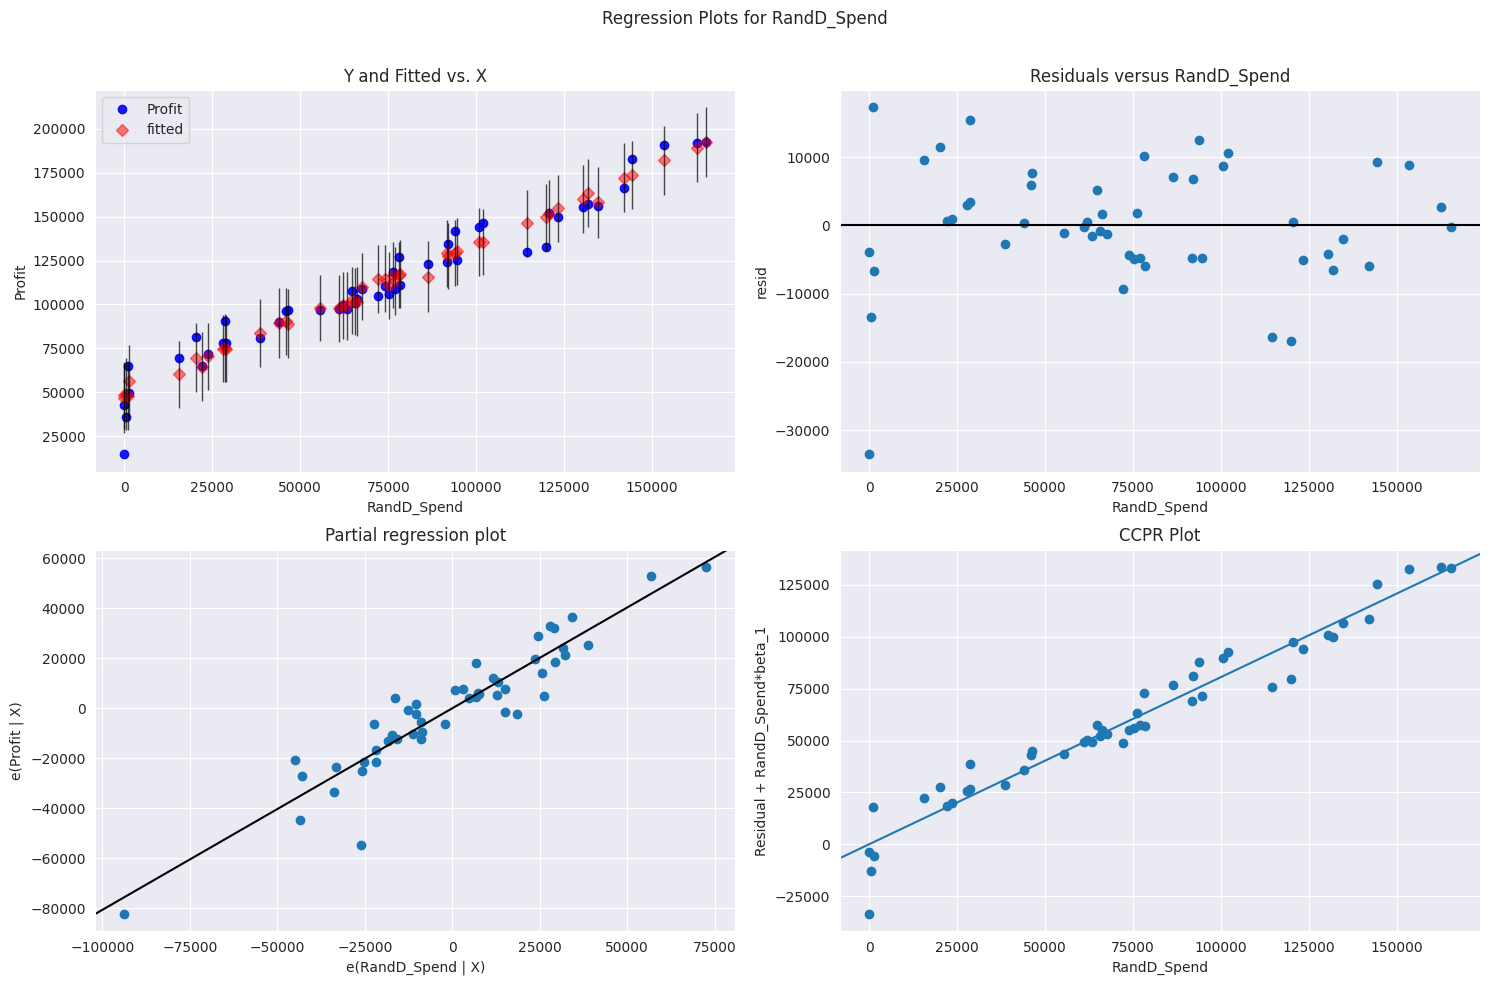

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "RandD_Spend", fig=fig)
plt.show()

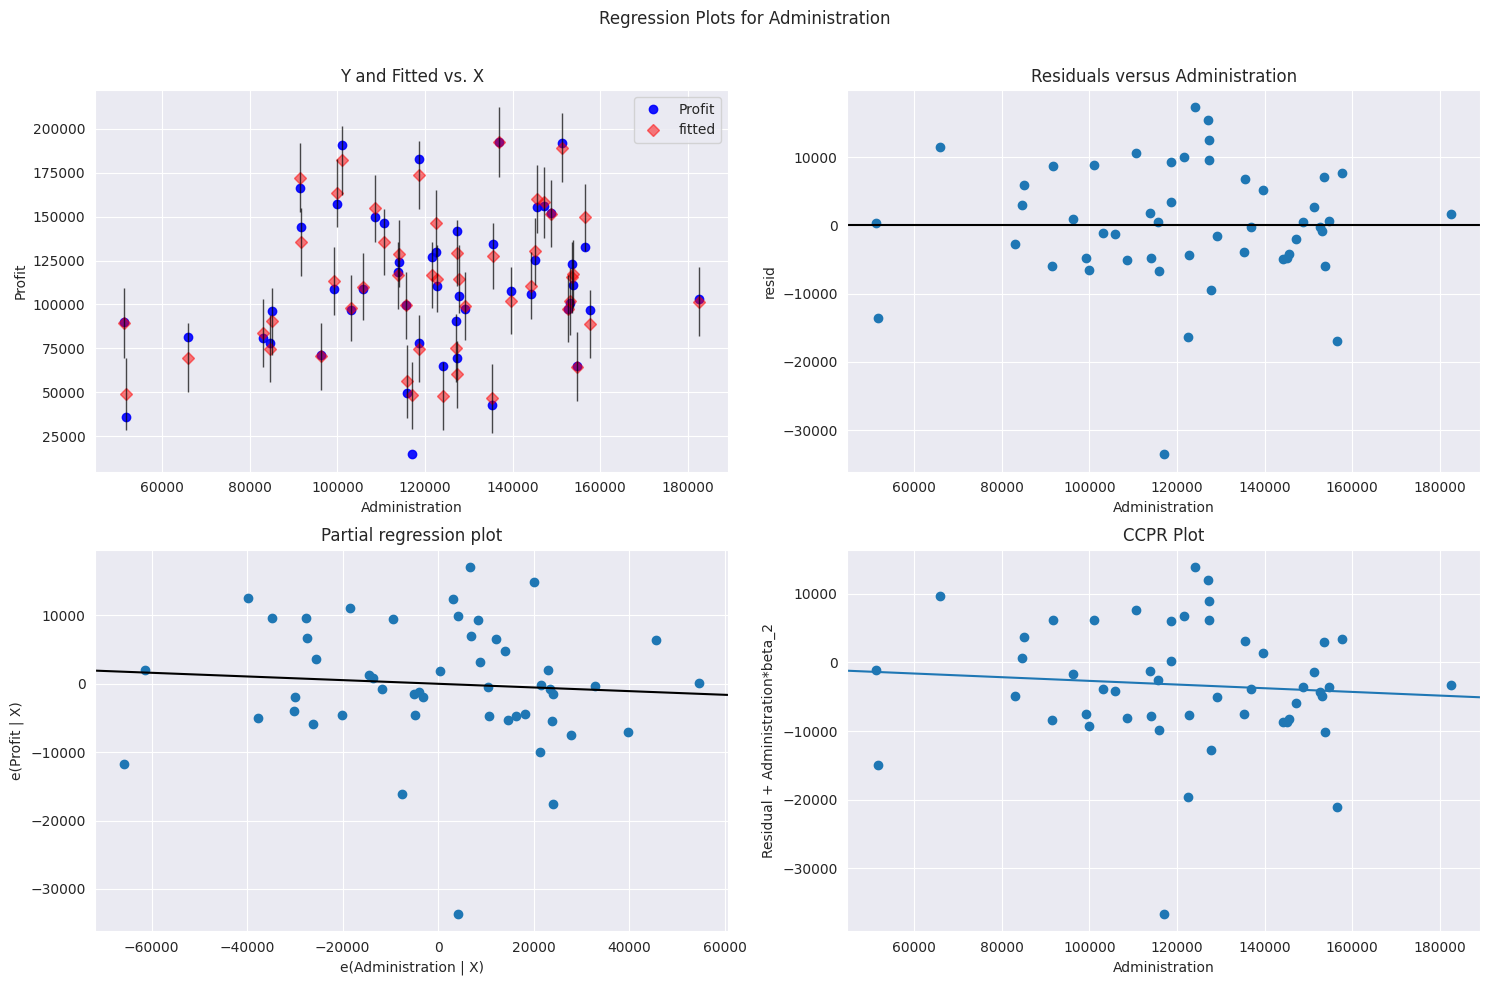

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

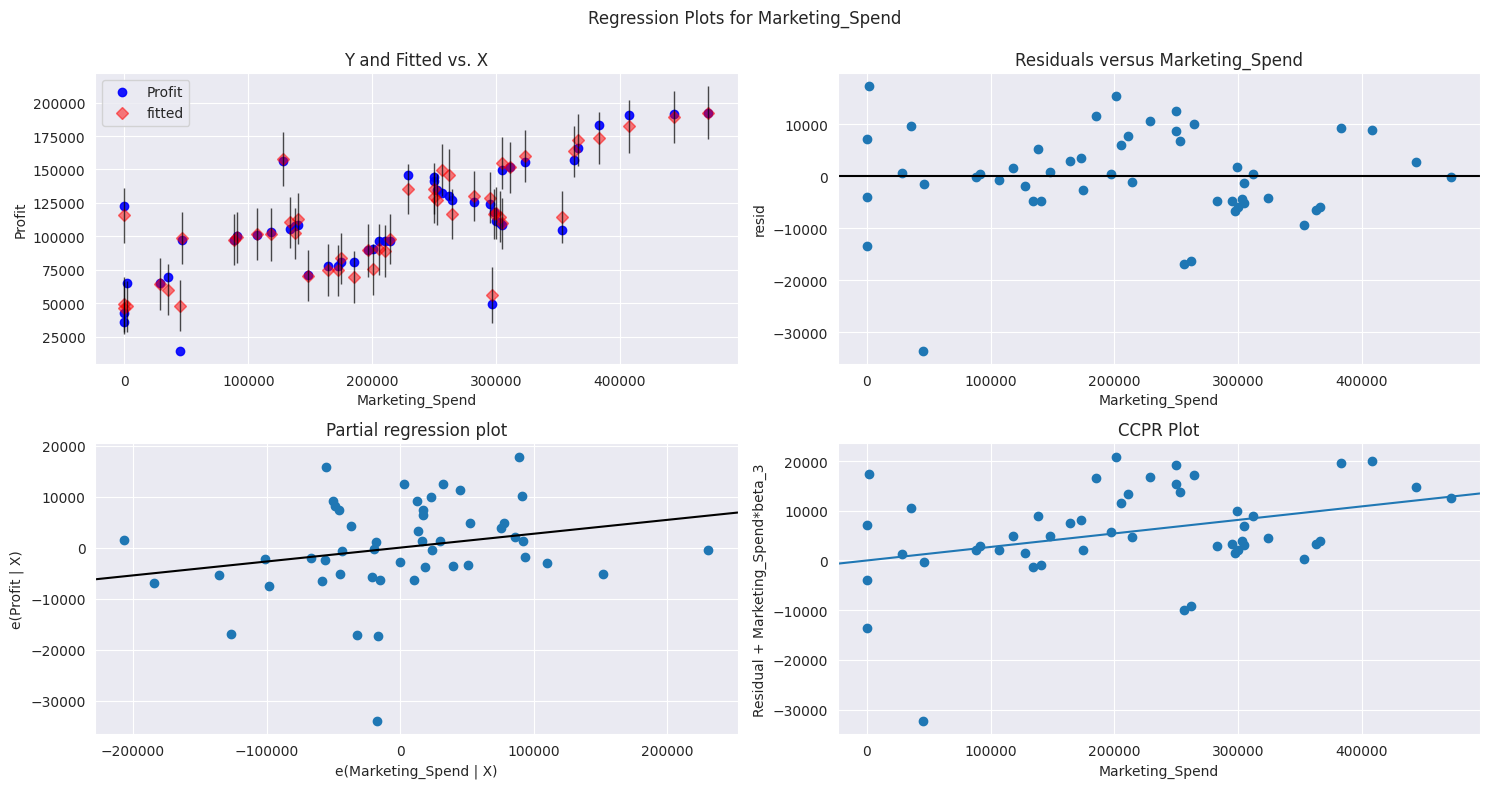

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

**Model Deletion Diagnostics**

Detecting Influencers/Outliers


Cook's distance

In [ ]:
module_influence = model.get_influence()
(c, _) = module_influence.cooks_distance

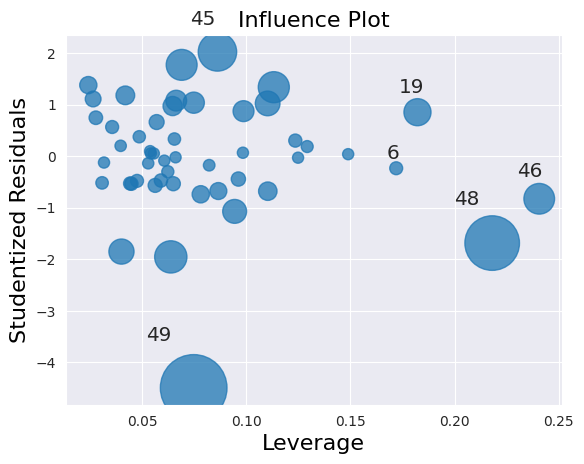

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

Since the value is<1 so we can finalize the model.

In [ ]:
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)